<a href="https://colab.research.google.com/github/sunshineluyao/design-principle-blockchain/blob/main/code/NLP_Blockchain_SoKs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 0: Set-up

In [124]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [125]:
pip install igviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
import pandas as pd
import numpy as np

In [127]:
df = pd.read_csv("https://raw.githubusercontent.com/sunshineluyao/design-principle-blockchain/main/data/SoK.csv")
df

Item type                                            Authors  \
0   Conference Paper                            Almashaqbeh G,Solomon R   
1   Conference Paper  Bonneau J,Miller A,Clark J,Narayanan A,Kroll J...   
2    Journal Article                                             Wang G   
3   Conference Paper             Chatzigiannis P,Baldimtsi F,Chalkias K   
4   Conference Paper                      Eskandari S,Moosavi S,Clark J   
..               ...                                                ...   
57   Journal Article  Casino F,Pina C,Lأ³pez-Aguilar P,Batista E,Sol...   
58   Journal Article                        Deuber D,Ronge V,Rأ¼ckert C   
59   Journal Article                      Zhou Q,Huang H,Zheng Z,Bian J   
60   Journal Article                                  Franzoni F,Daza V   
61  Conference Paper                          Moin A,Sekniqi K,Sirer EG   

                                                Title  \
0   SoK: privacy-preserving computing in the block...   
1   Sok: Research perspectives and challenges for ...   
2   SoK: Understanding BFT Consensus in the Age of...   
3   SoK: auditability and accountability in distri...   
4   Sok: Transparent dishonesty: front-running att...   
..                                                ...   
57  SoK: Cross-border Criminal Investigations and ...   
58  SoK: Assumptions Underlying Cryptocurrency Dea...   
59   Solutions to scalability of blockchain: A survey   
60  SoK: Network-Level Attacks on the Bitcoin P2P ...   
61  SoK: A classification framework for stablecoin...   

                                             Abstract  \
0   Privacy is a huge concern for cryptocurrencies...   
1   Bitcoin has emerged as the most successful cry...   
2   Blockchain as an enabler to current Internet i...   
3   Enforcement of policy regulations and availabi...   
4   We consider front-running to be a course of ac...   
..                                                ...   
57  \nDigital evidence underpin the majority of cr...   
58  In recent years, cryptocurrencies have increas...   
59  Blockchain-based decentralized cryptocurrencie...   
60  Over the last decade, Bitcoin has revolutioniz...   
61  Stablecoins promise to bridge fiat currencies ...   

                                                  URL  \
0        https://ieeexplore.ieee.org/document/9797340   
1        https://ieeexplore.ieee.org/document/7163021   
2                    https://eprint.iacr.org/2021/911   
3   https://link.springer.com/chapter/10.1007/978-...   
4   https://link.springer.com/chapter/10.1007/978-...   
..                                                ...   
57  https://academic.oup.com/cybersecurity/article...   
58                   https://eprint.iacr.org/2022/763   
59       https://ieeexplore.ieee.org/document/8962150   
60       https://ieeexplore.ieee.org/document/9877811   
61  https://link.springer.com/chapter/10.1007/978-...   

                             Journal  Publication year  Volume  Issue  \
0                                NaN              2022     NaN    NaN   
1                                NaN              2015     NaN    NaN   
2          Cryptology ePrint Archive              2021     NaN    NaN   
3                                NaN              2021     NaN    NaN   
4                                NaN              2020     NaN    NaN   
..                               ...               ...     ...    ...   
57  arXiv preprint arXiv:2205. 12911              2022     NaN    NaN   
58         Cryptology ePrint Archive              2022     NaN    NaN   
59                       Ieee Access              2020     8.0    NaN   
60                       IEEE Access              2022    10.0    NaN   
61                               NaN              2020     NaN    NaN   

          Pages Institution Publisher Book title  \
0       124-139        IEEE       NaN        NaN   
1       104-121        IEEE       NaN        NaN   
2           NaN       

# Part I The World Cloud

## 1.1. Title

In [128]:
# Join the different processed titles together.
title = ','.join(list(df['Title'].values))
title

'SoK: privacy-preserving computing in the blockchain era,Sok: Research perspectives and challenges for bitcoin and cryptocurrencies,SoK: Understanding BFT Consensus in the Age of Blockchains,SoK: auditability and accountability in distributed payment systems,Sok: Transparent dishonesty: front-running attacks on blockchain,Sok: Mitigation of front-running in decentralized finance,SoK of used cryptography in blockchain,SoK: Preventing Transaction Reordering Manipulations in Decentralized Finance,SoK: Decentralized Finance (DeFi) Incidents,SoK: Blockchain Governance,SoK: Blockchain Decentralization,SoK: A Stratified Approach to Blockchain Decentralization,Sok: Layer-two blockchain protocols,Sok: Sharding on blockchain,Sok: Validating bridges as a scaling solution for blockchains,Sok: Blockchain light clients,SoK: Diving into DAG-based blockchain systems,SoK: TEE-assisted Confidential Smart Contract,Sok: Communication across distributed ledgers,SoK: lending pools in decentralized finance,S

In [129]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:
stop_words = stopwords.words('english')
stop_words.extend([',',"SoK","survey",":","A","on","in","into","the","for","review",])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [131]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

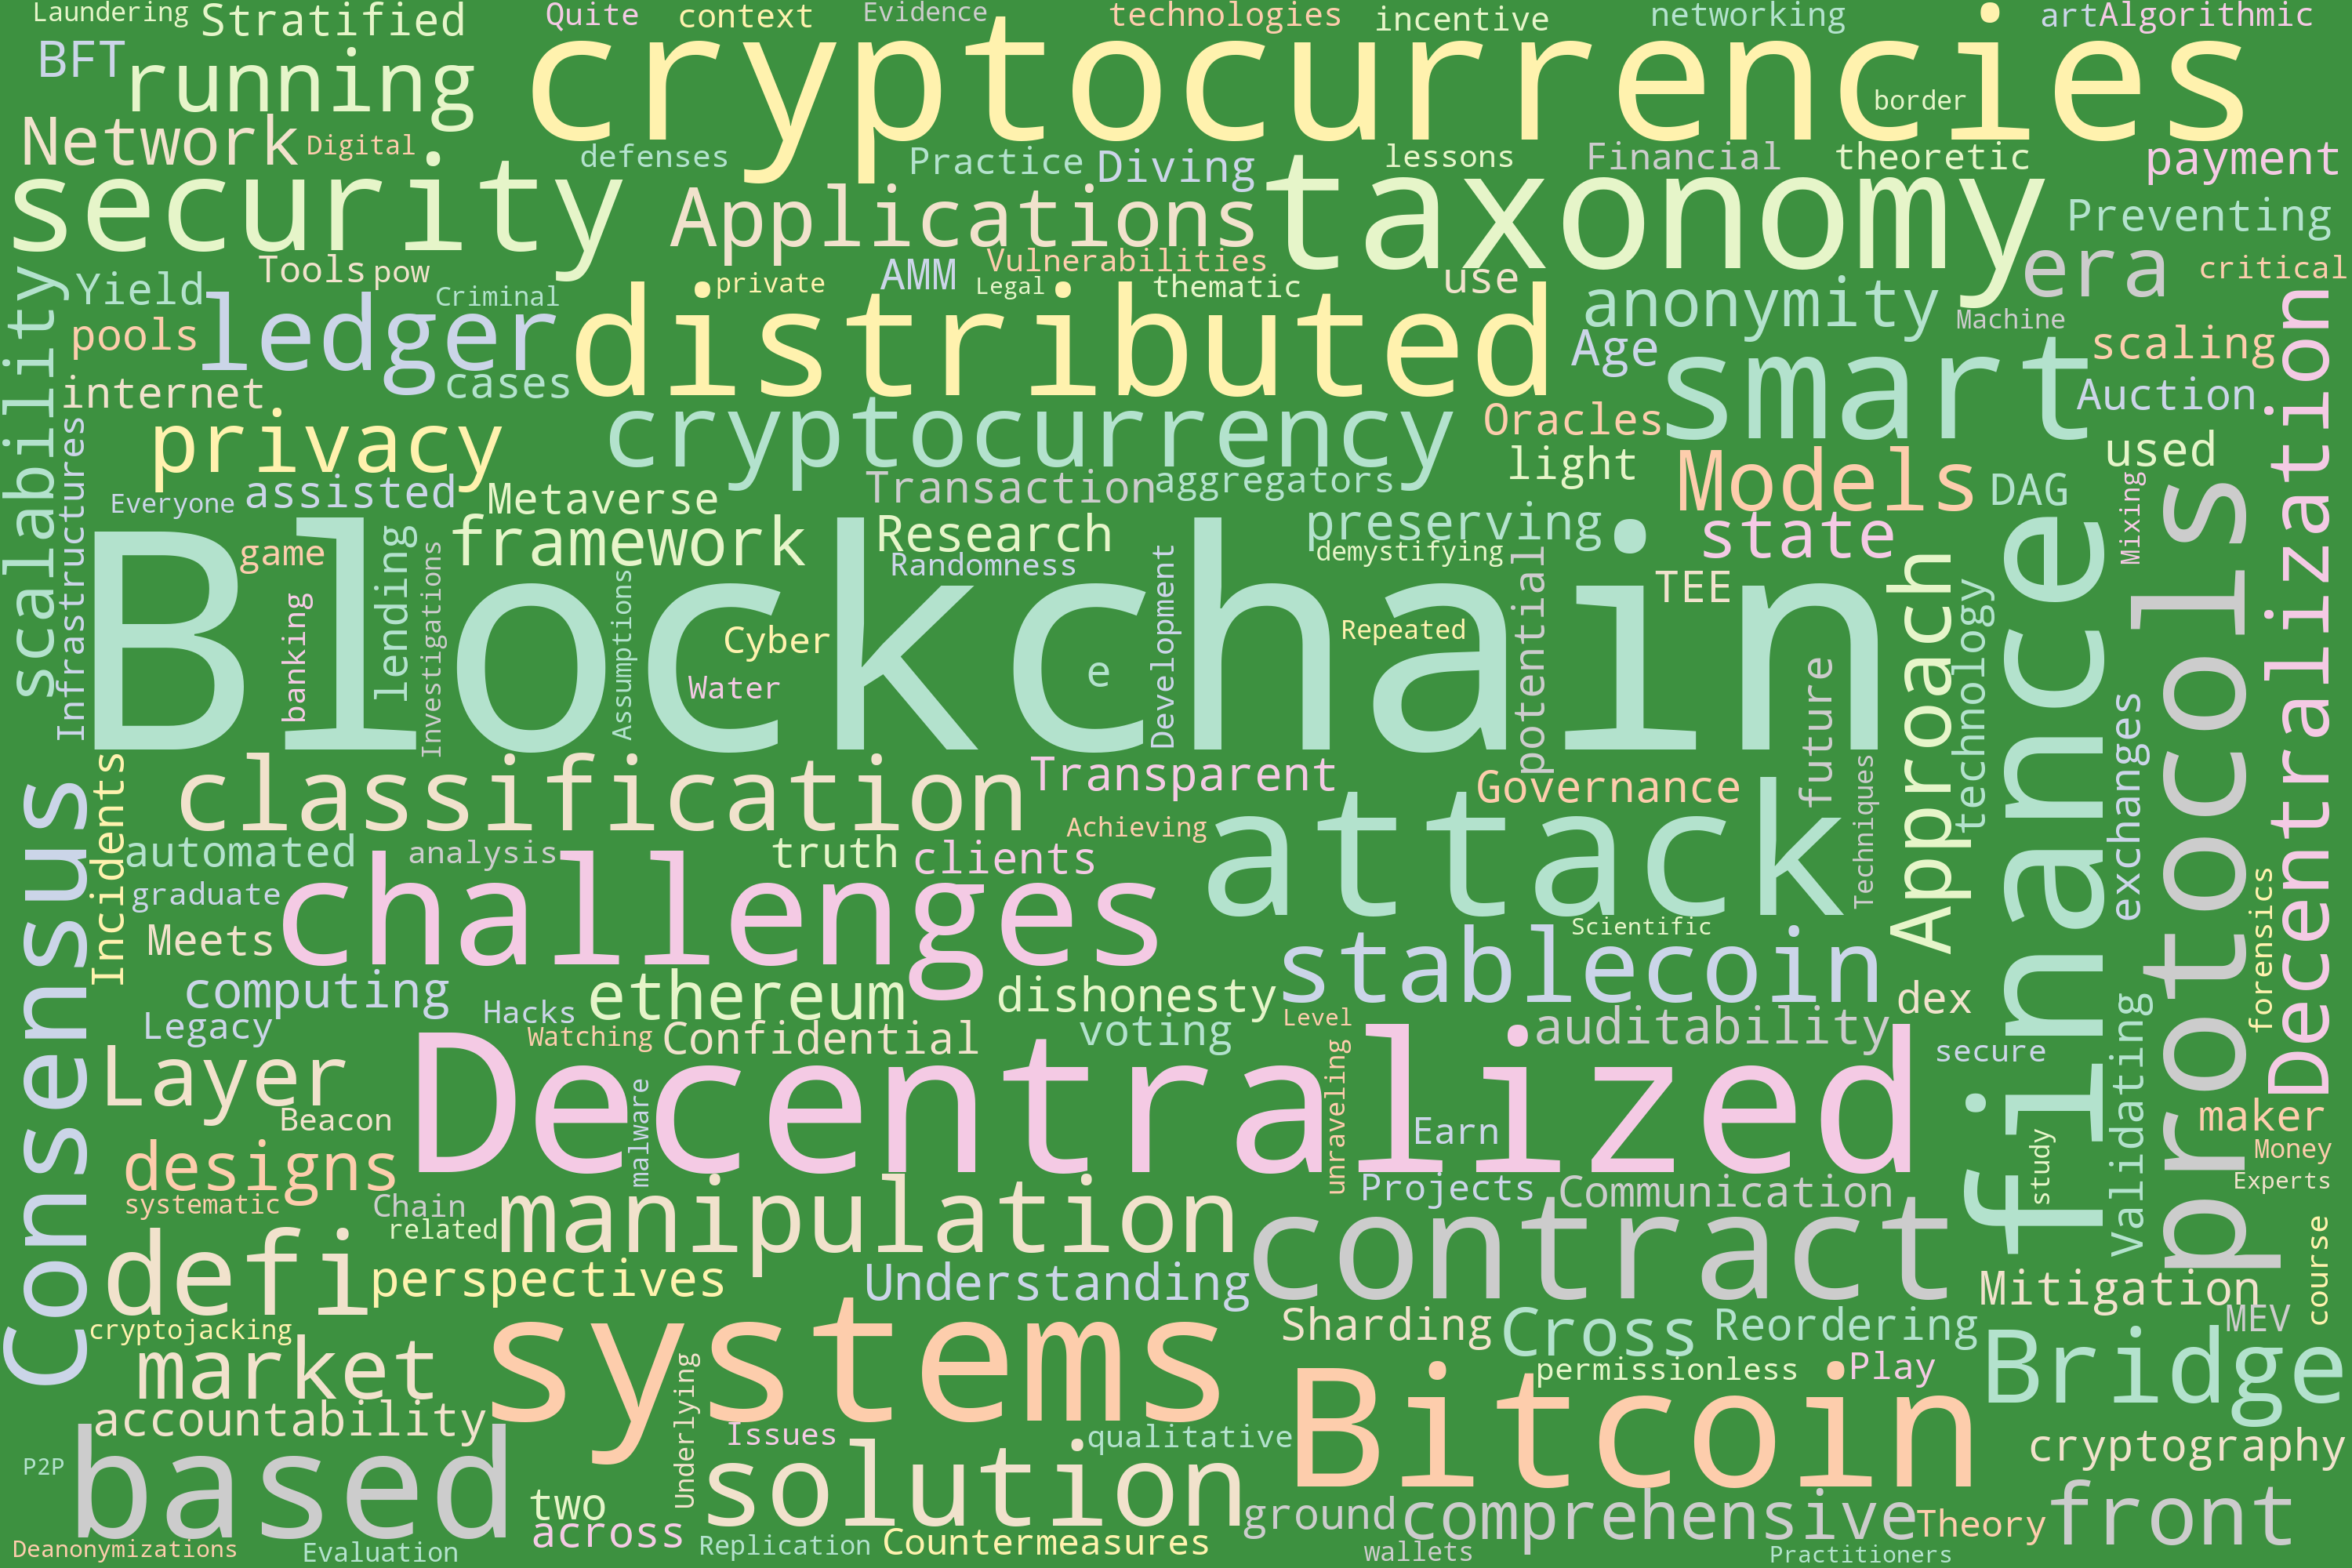

In [132]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# show the word cloud
wordcloud.to_image()

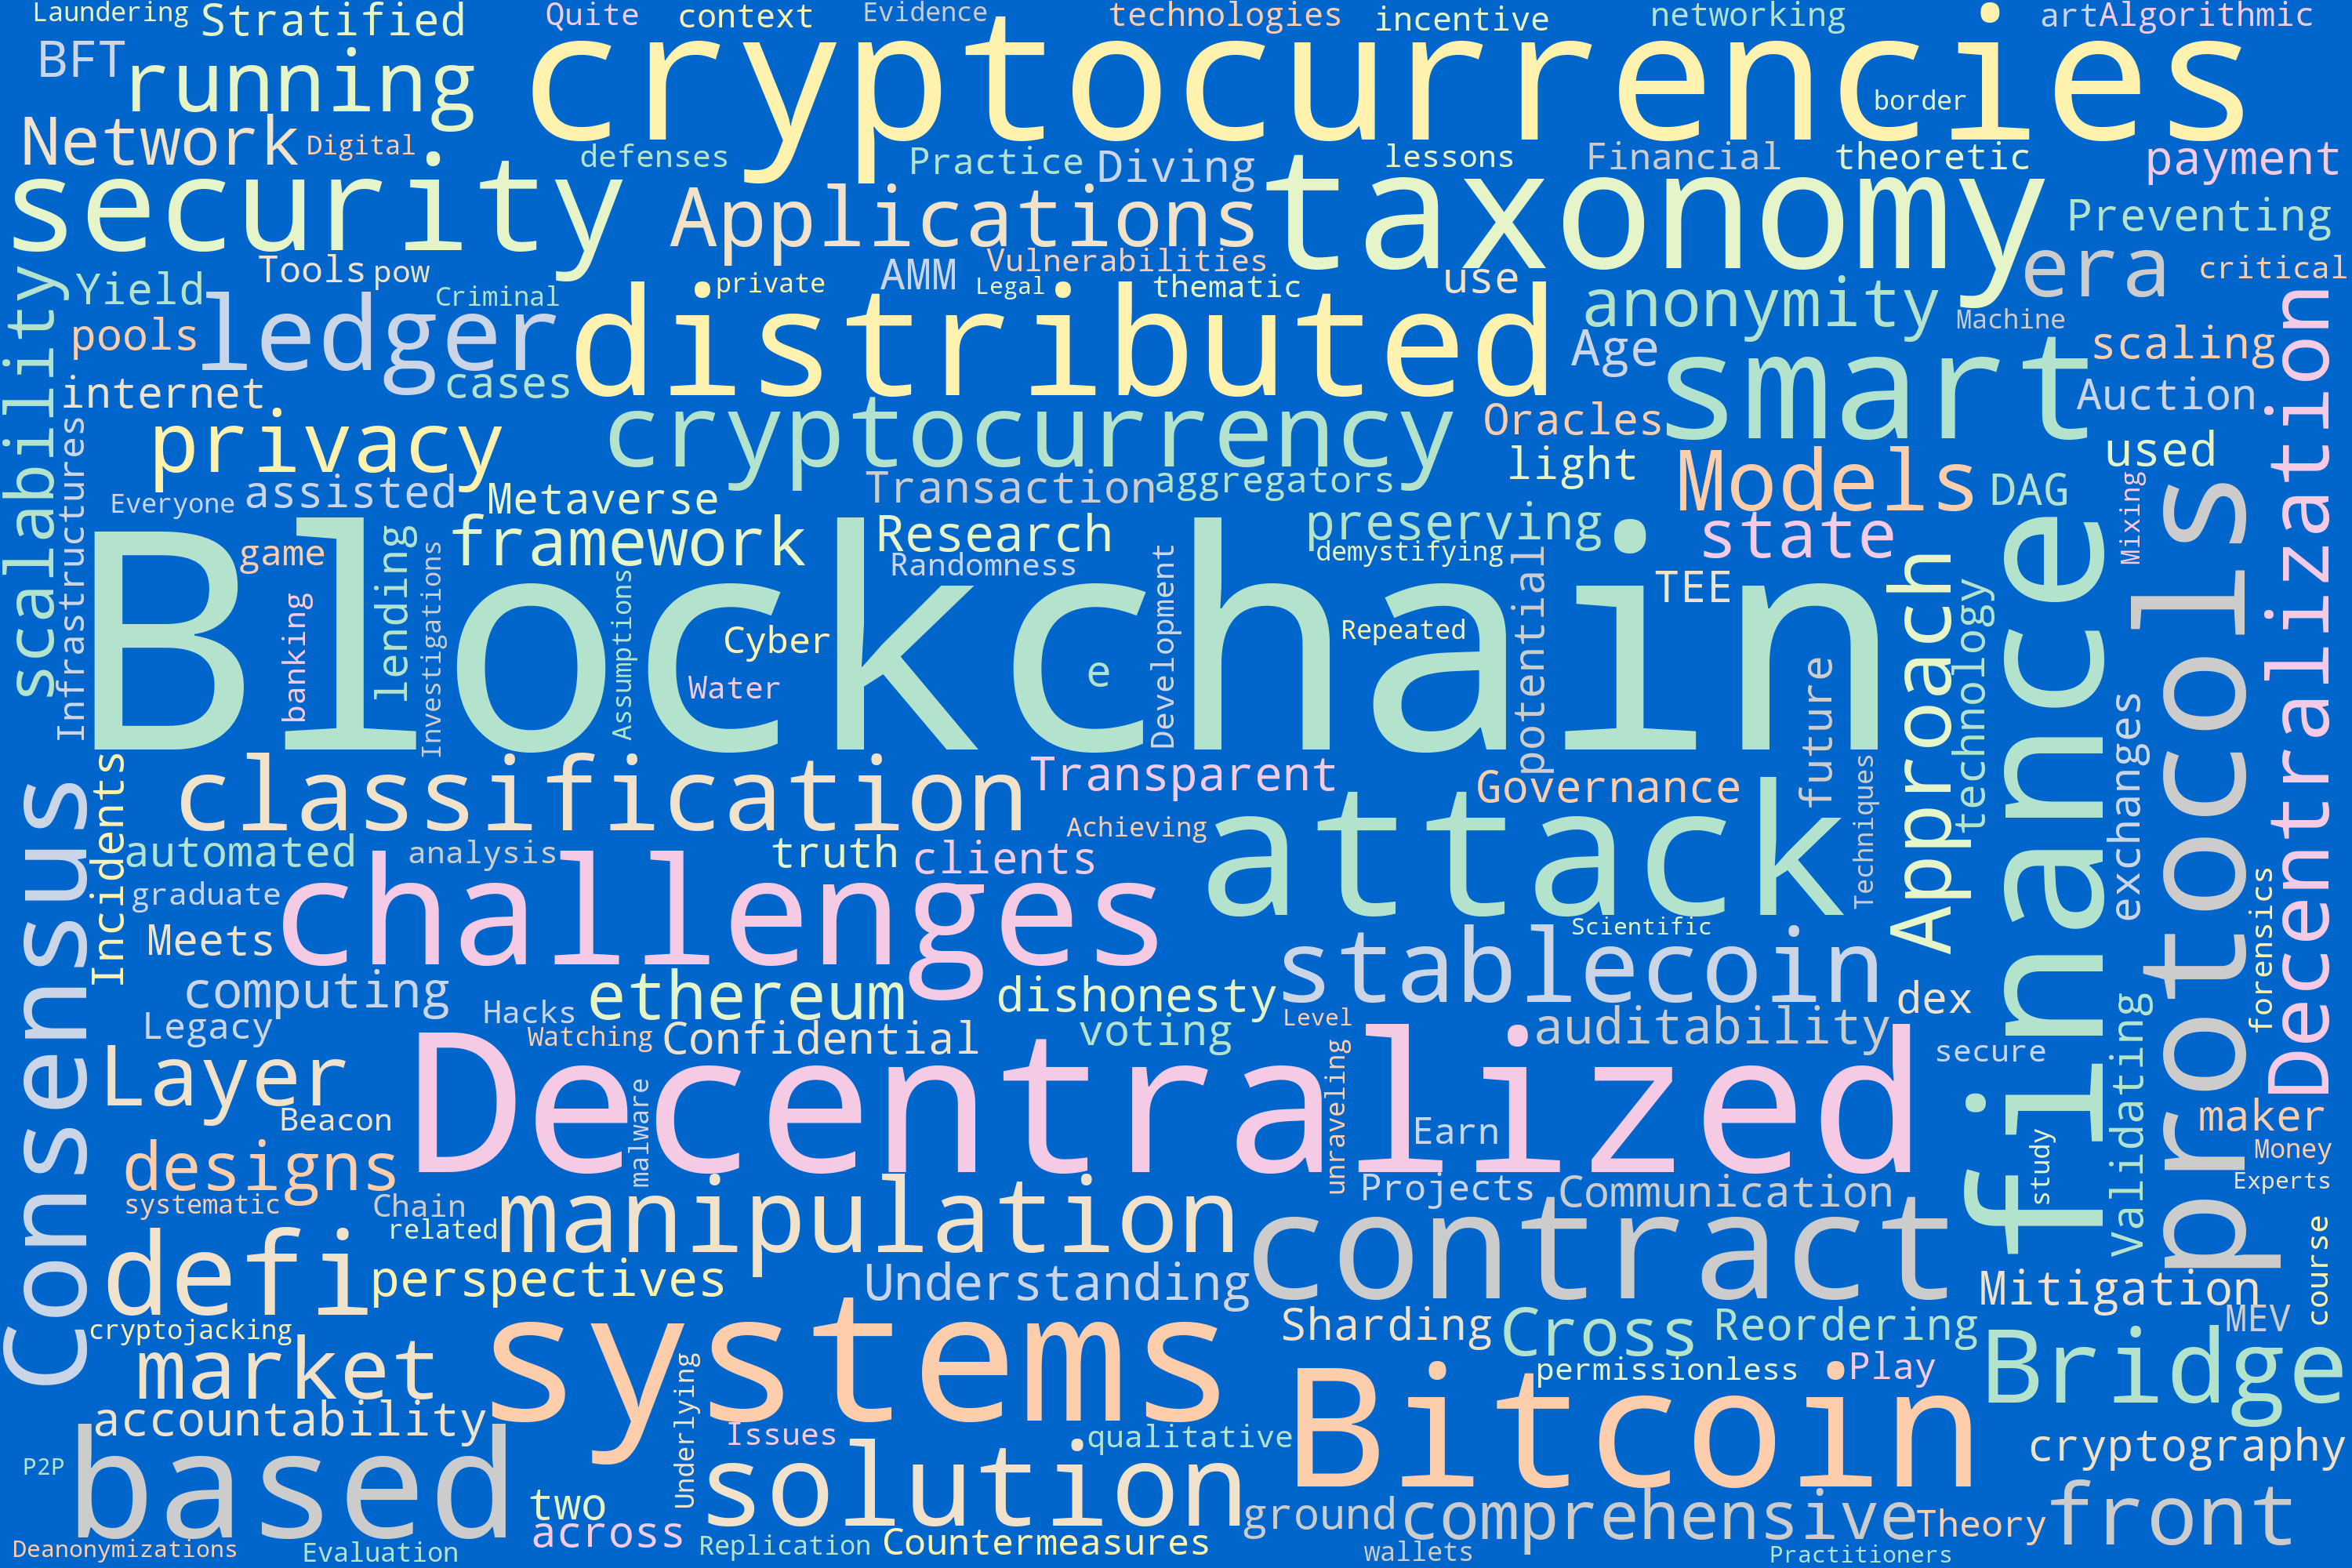

In [133]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# Show the word cloud
wordcloud.to_image()

## 1.2. Abstract

In [134]:
# Join the different processed titles together.
Abstract = ','.join(list(df['Abstract'].values))
Abstract

'Privacy is a huge concern for cryptocurrencies and blockchains as most of these systems log everything in the clear. This has resulted in several academic and industrial initiatives to address privacy. Starting with the UTXO model of Bitcoin, initial works brought confidentiality and anonymity to payments. Recent works have expanded to support more generalized forms of private computation. Such solutions tend to be highly involved as they rely on advanced cryptographic primitives and creative techniques to handle issues related to dealing with private records (e.g. concurrency and double spending). This situation makes it hard to comprehend the current state-of-the-art, much less build on top of it. To address these challenges, we develop a systematization of knowledge for privacy-preserving solutions in blockchain. To the best of our knowledge, our work is the first of its kind. After motivating design challenges, we devise two systematization frameworks-the first as a stepping stone

In [135]:
stop_words = stopwords.words('english')
stop_words.extend(['.'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

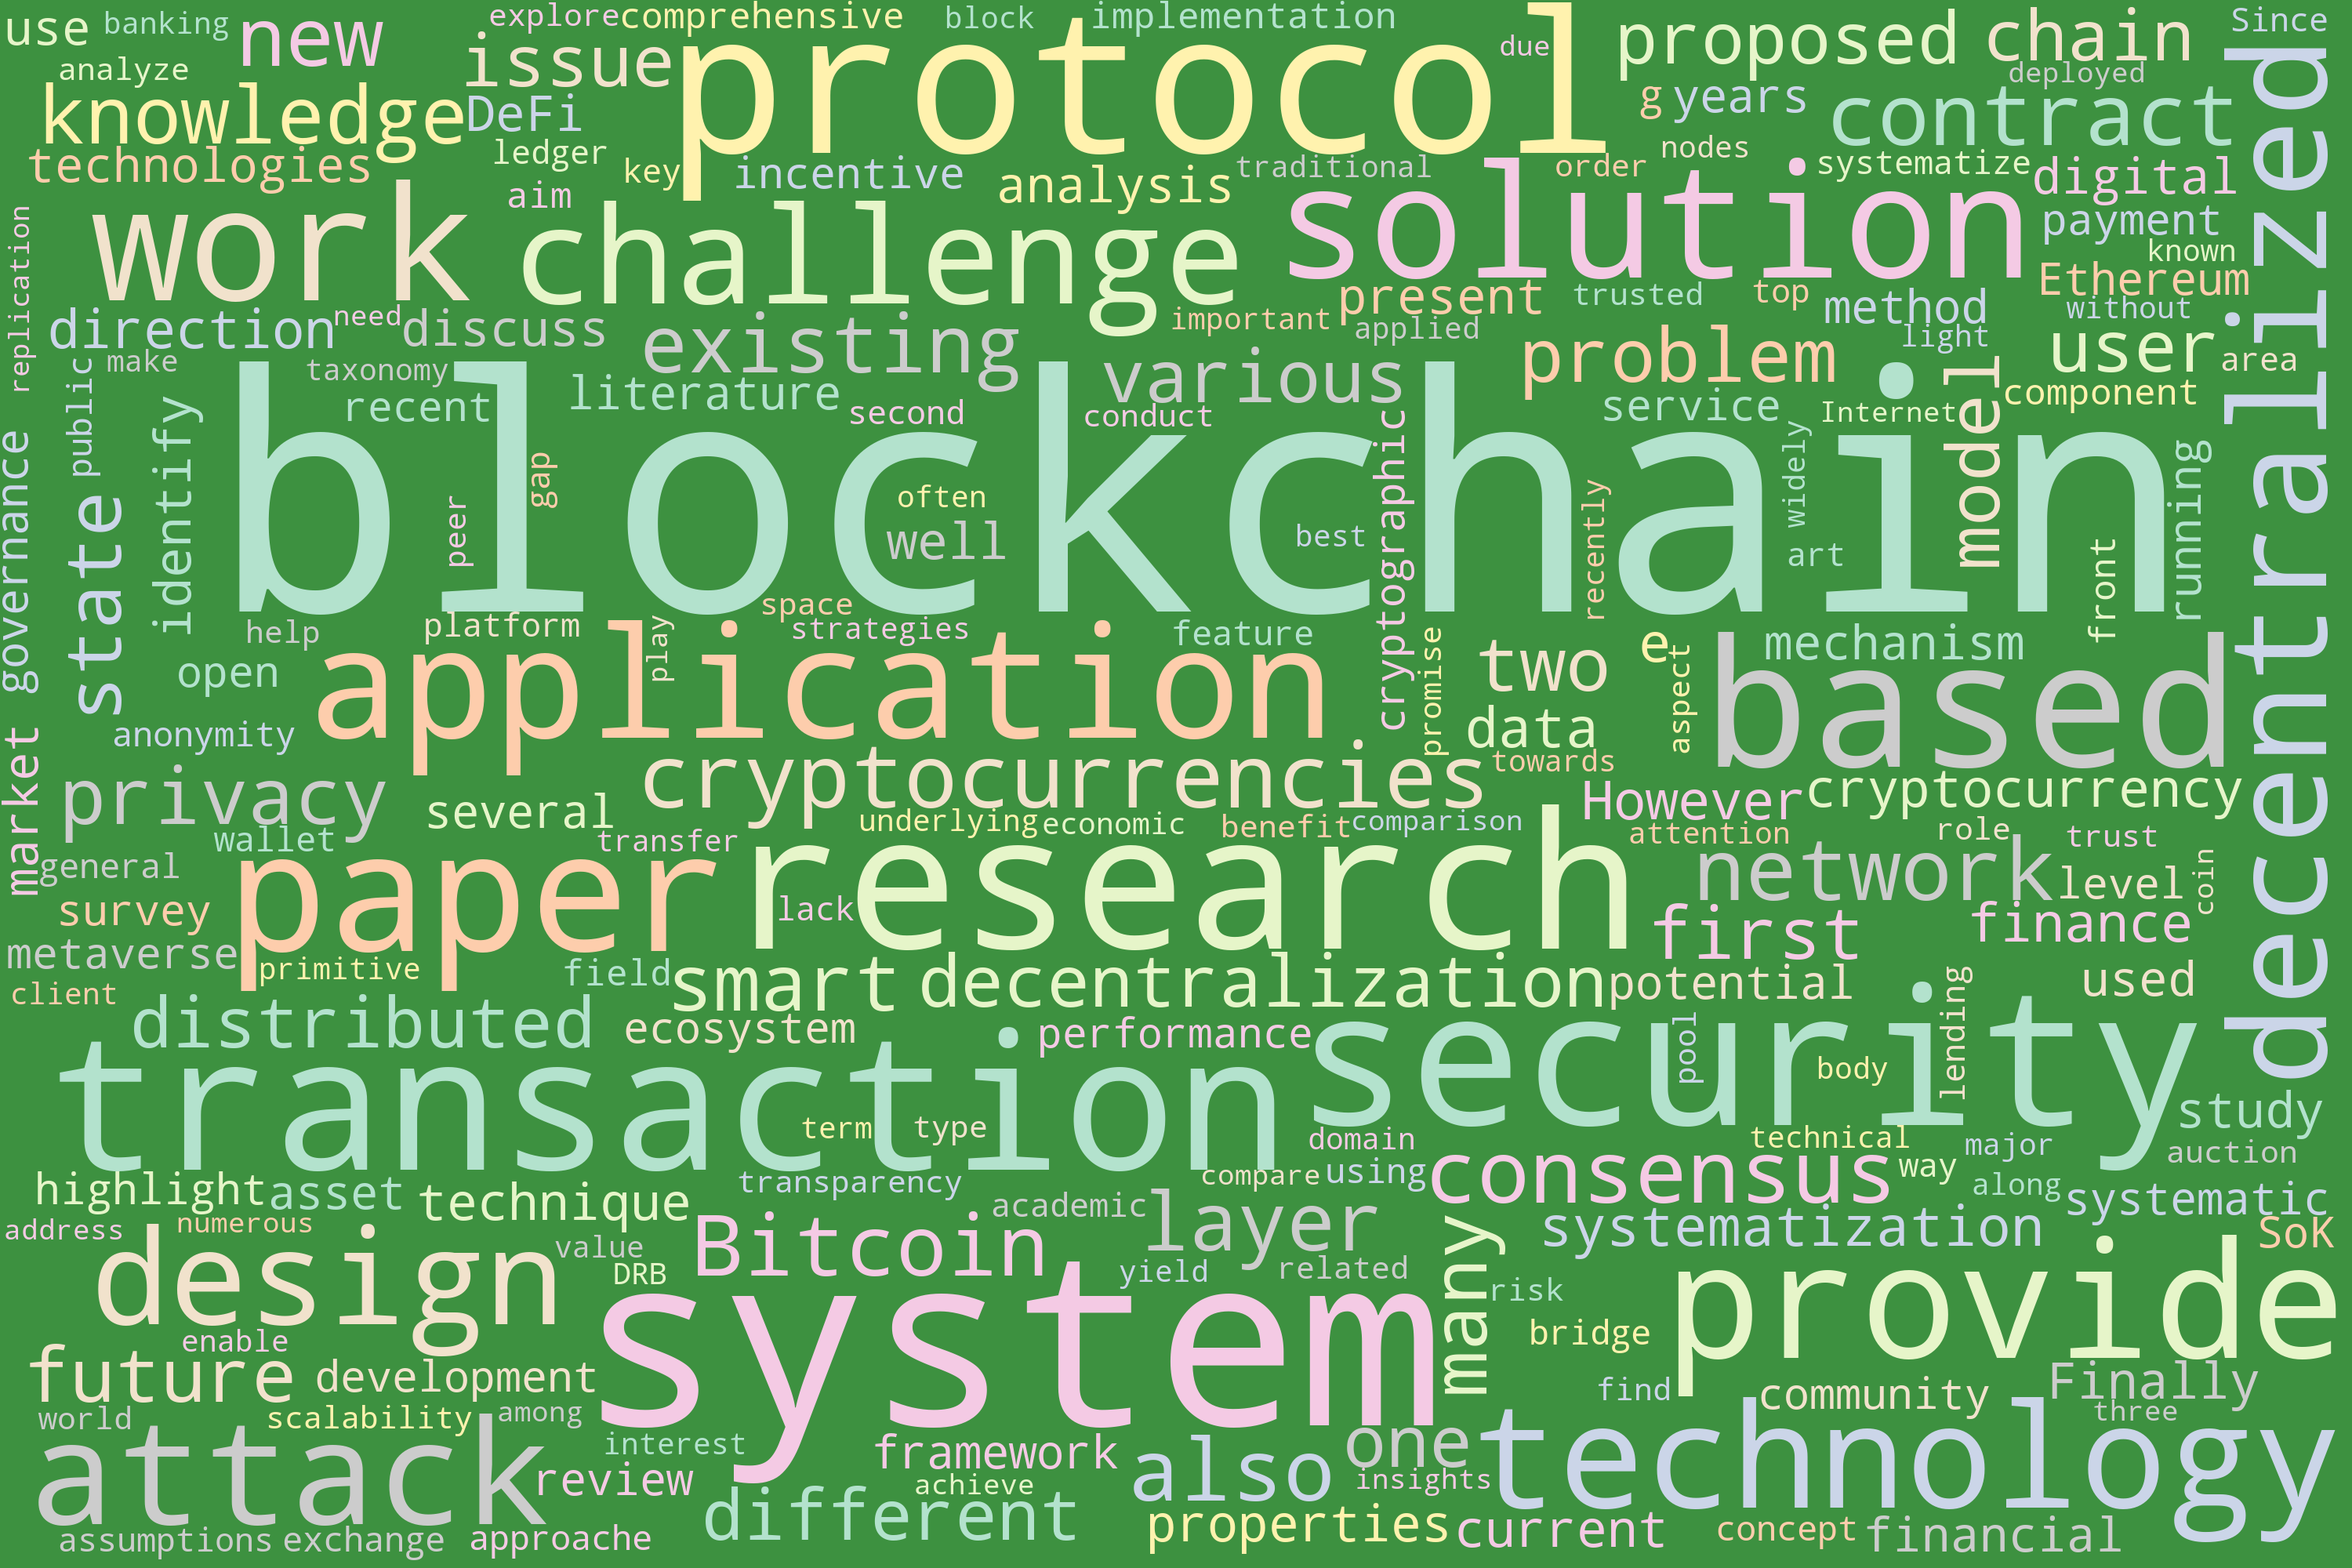

In [136]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# show the word cloud
wordcloud.to_image()

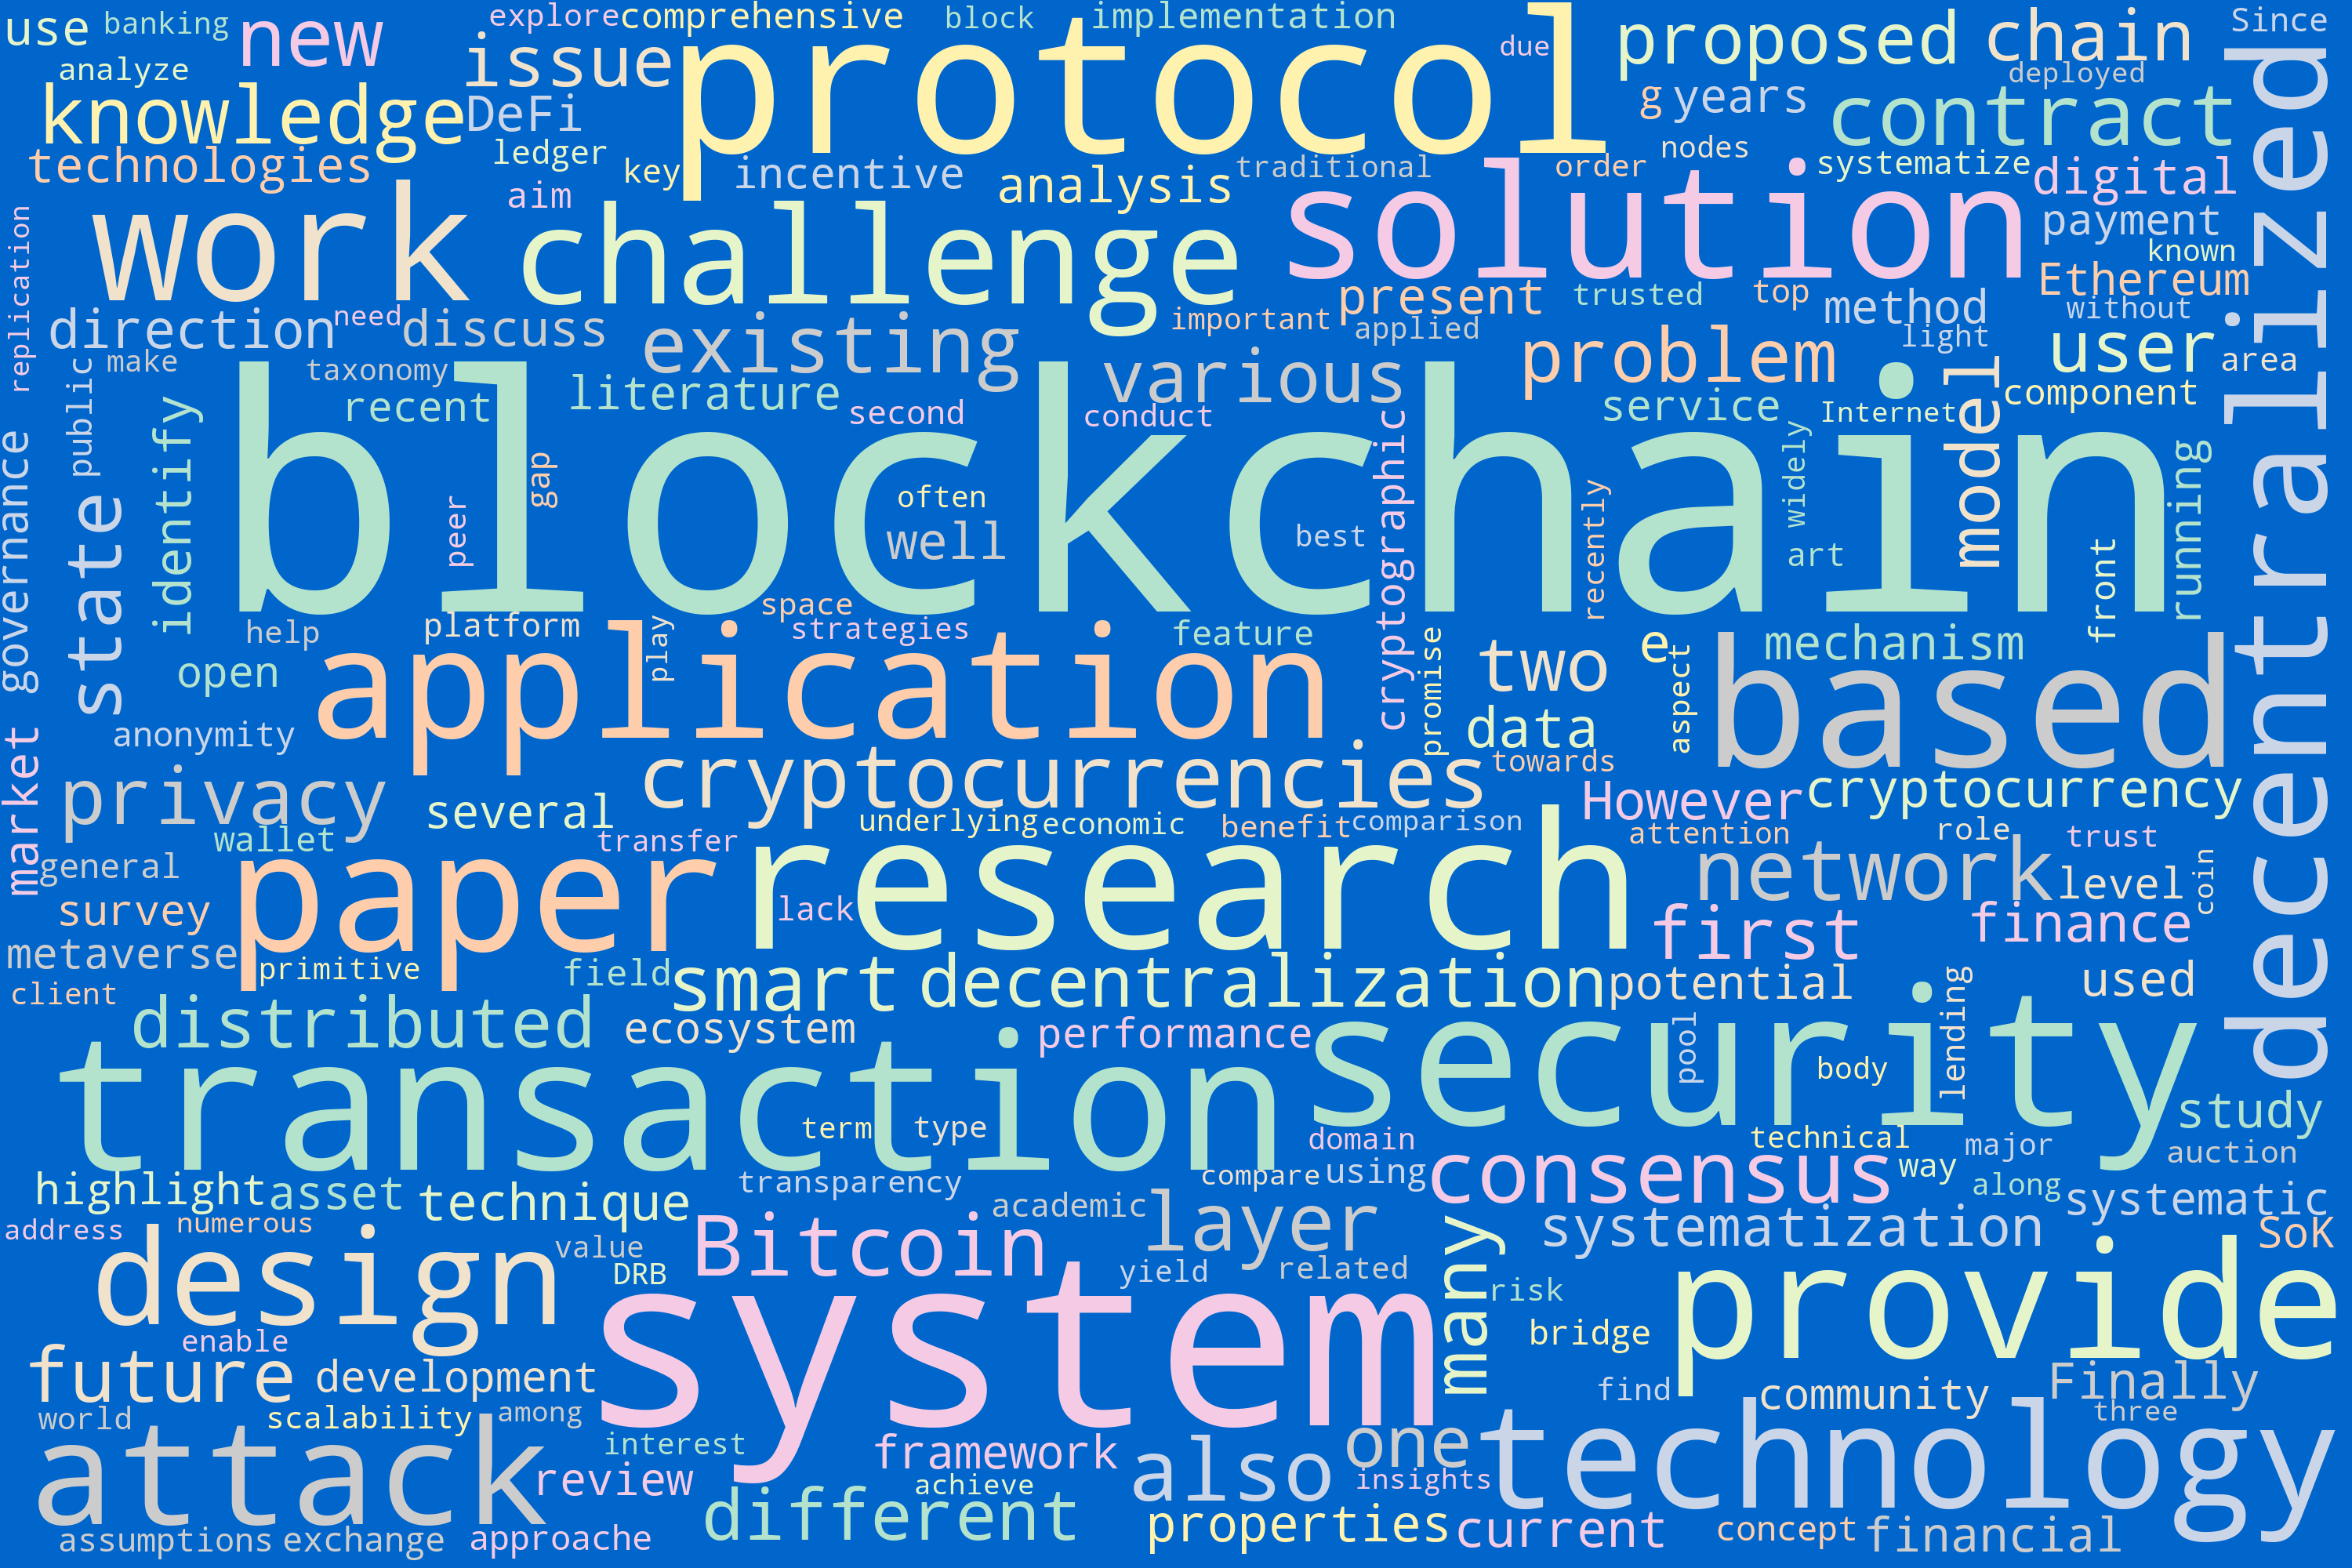

In [137]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# Show the word cloud
wordcloud.to_image()

# Part II Bigram

## 2.1. Title

In [138]:
df.columns

Index(['Item type', 'Authors', 'Title', 'Abstract', 'URL', 'Journal',
       'Publication year', 'Volume', 'Issue', 'Pages', 'Institution',
       'Publisher', 'Book title', 'Proceedings title', 'Date published'],
      dtype='object')

In [139]:
import regex
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [140]:
df_Title  = df['Title'].str.lower()

In [141]:
Titles = ('. '.join(list(df_Title.values)))
Titles = regex.sub(r'\b[0-9]+\b\W*', '', Titles)
Titles = regex.sub(r'(?:^| )\w(?:$| )', ' ', Titles)
Titles =Titles.replace(":"," ")
Titles =Titles.replace("."," ")
Titles =Titles.replace("?"," ")
Titles =Titles.replace("("," ")
Titles =Titles.replace(")"," ")
Titles

'sok  privacy-preserving computing in the blockchain era  sok  research perspectives and challenges for bitcoin and cryptocurrencies  sok  understanding bft consensus in the age of blockchains  sok  auditability and accountability in distributed payment systems  sok  transparent dishonesty  front-running attacks on blockchain  sok  mitigation of front-running in decentralized finance  sok of used cryptography in blockchain  sok  preventing transaction reordering manipulations in decentralized finance  sok  decentralized finance  defi  incidents  sok  blockchain governance  sok  blockchain decentralization  sok  stratified approach to blockchain decentralization  sok  layer-two blockchain protocols  sok  sharding on blockchain  sok  validating bridges as scaling solution for blockchains  sok  blockchain light clients  sok  diving into dag-based blockchain systems  sok  tee-assisted confidential smart contract  sok  communication across distributed ledgers  sok  lending pools in decentra

In [142]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [143]:
text_no_urls = remove_url(Titles)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [144]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [145]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [146]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['sok',
 'privacy-preserving',
 'computing',
 'in',
 'the',
 'blockchain',
 'era',
 'sok',
 'research',
 'perspective',
 'and',
 'challenge',
 'for',
 'bitcoin',
 'and',
 'cryptocurrencies',
 'sok',
 'understanding',
 'bft',
 'consensus',
 'in',
 'the',
 'age',
 'of',
 'blockchains',
 'sok',
 'auditability',
 'and',
 'accountability',
 'in',
 'distributed',
 'payment',
 'system',
 'sok',
 'transparent',
 'dishonesty',
 'front-running',
 'attack',
 'on',
 'blockchain',
 'sok',
 'mitigation',
 'of',
 'front-running',
 'in',
 'decentralized',
 'finance',
 'sok',
 'of',
 'used',
 'cryptography',
 'in',
 'blockchain',
 'sok',
 'preventing',
 'transaction',
 'reordering',
 'manipulation',
 'in',
 'decentralized',
 'finance',
 'sok',
 'decentralized',
 'finance',
 'defi',
 'incident',
 'sok',
 'blockchain',
 'governance',
 'sok',
 'blockchain',
 'decentralization',
 'sok',
 'stratified',
 'approach',
 'to',
 'blockchain',
 'decentralization',
 'sok',
 'layer-two',
 'blockchain',
 'protocol',


In [147]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok']]
words_nsw

['privacy-preserving',
 'computing',
 'blockchain',
 'era',
 'research',
 'perspective',
 'challenge',
 'bitcoin',
 'cryptocurrencies',
 'understanding',
 'bft',
 'consensus',
 'age',
 'blockchains',
 'auditability',
 'accountability',
 'distributed',
 'payment',
 'system',
 'transparent',
 'dishonesty',
 'front-running',
 'attack',
 'blockchain',
 'mitigation',
 'front-running',
 'decentralized',
 'finance',
 'used',
 'cryptography',
 'blockchain',
 'preventing',
 'transaction',
 'reordering',
 'manipulation',
 'decentralized',
 'finance',
 'decentralized',
 'finance',
 'defi',
 'incident',
 'blockchain',
 'governance',
 'blockchain',
 'decentralization',
 'stratified',
 'approach',
 'blockchain',
 'decentralization',
 'layer-two',
 'blockchain',
 'protocol',
 'sharding',
 'blockchain',
 'validating',
 'bridge',
 'scaling',
 'solution',
 'blockchains',
 'blockchain',
 'light',
 'client',
 'diving',
 'dag-based',
 'blockchain',
 'system',
 'tee-assisted',
 'confidential',
 'smart',
 'c

In [148]:
import collections

In [149]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [150]:
title_bigram=pd.DataFrame(bigram_counts)
title_bigram.columns = ['bigram', 'counts']
title_bigram = title_bigram.sort_values(by=['counts'], ascending=False)
title_bigram.head(20)

bigram  counts
0         (decentralized, finance)       5
1                (smart, contract)       3
6             (blockchain, system)       2
9          (framework, stablecoin)       2
8      (classification, framework)       2
7            (distributed, ledger)       2
10            (stablecoin, design)       2
5   (blockchain, decentralization)       2
4                  (finance, defi)       2
3         (finance, decentralized)       2
2                (blockchain, era)       2
66         (dag-based, blockchain)       1
75           (pool, decentralized)       1
74                 (lending, pool)       1
73               (ledger, lending)       1
72           (across, distributed)       1
71         (communication, across)       1
70       (contract, communication)       1
69           (confidential, smart)       1
68    (tee-assisted, confidential)       1

In [151]:
print(title_bigram.head(25).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                        bigram &  counts \\
\midrule
      (decentralized, finance) &       5 \\
             (smart, contract) &       3 \\
          (blockchain, system) &       2 \\
       (framework, stablecoin) &       2 \\
   (classification, framework) &       2 \\
         (distributed, ledger) &       2 \\
          (stablecoin, design) &       2 \\
(blockchain, decentralization) &       2 \\
               (finance, defi) &       2 \\
      (finance, decentralized) &       2 \\
             (blockchain, era) &       2 \\
       (dag-based, blockchain) &       1 \\
         (pool, decentralized) &       1 \\
               (lending, pool) &       1 \\
             (ledger, lending) &       1 \\
         (across, distributed) &       1 \\
       (communication, across) &       1 \\
     (contract, communication) &       1 \\
         (confidential, smart) &       1 \\
  (tee-assisted, confidential) &       1 \\
        (system, tee-assisted) &      

In [152]:
print(title_bigram.head(25).to_markdown(index=False))

| bigram                             |   counts |
|:-----------------------------------|---------:|
| ('decentralized', 'finance')       |        5 |
| ('smart', 'contract')              |        3 |
| ('blockchain', 'system')           |        2 |
| ('framework', 'stablecoin')        |        2 |
| ('classification', 'framework')    |        2 |
| ('distributed', 'ledger')          |        2 |
| ('stablecoin', 'design')           |        2 |
| ('blockchain', 'decentralization') |        2 |
| ('finance', 'defi')                |        2 |
| ('finance', 'decentralized')       |        2 |
| ('blockchain', 'era')              |        2 |
| ('dag-based', 'blockchain')        |        1 |
| ('pool', 'decentralized')          |        1 |
| ('lending', 'pool')                |        1 |
| ('ledger', 'lending')              |        1 |
| ('across', 'distributed')          |        1 |
| ('communication', 'across')        |        1 |
| ('contract', 'communication')      |        1 |


In [153]:
title_bigram.to_csv("title_bigram.csv")

In [154]:
import networkx as nx

In [155]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

In [156]:
# Create dictionary of bigrams and their counts
d = title_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [157]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

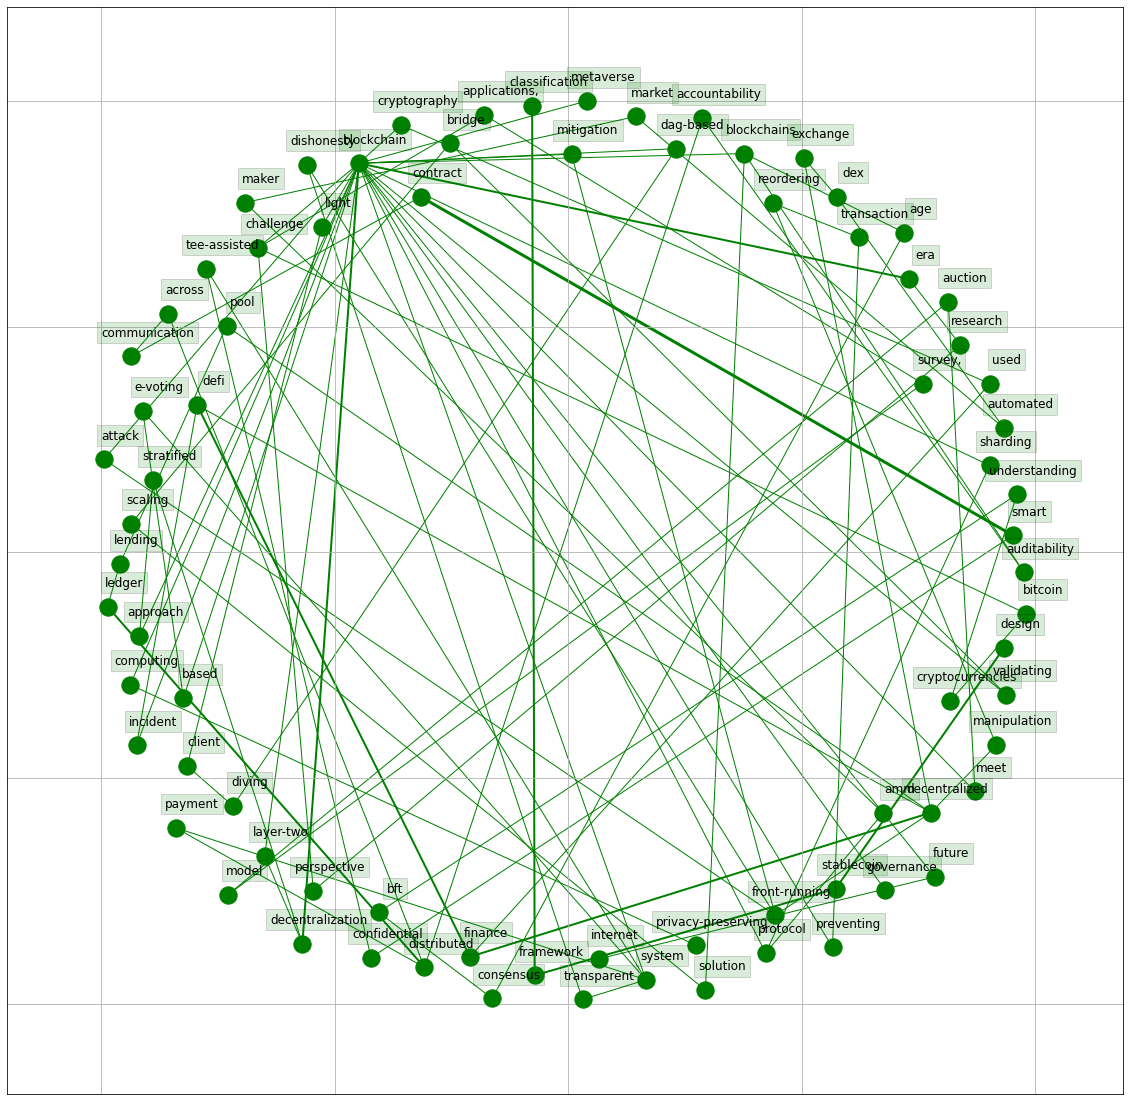

In [158]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='green',
                 node_color='green',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='green', alpha=0.15),
            horizontalalignment='center', fontsize=12)
plt.show()

In [159]:
import igviz as ig

In [160]:
import os

new_path = "figures/title_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [161]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/title_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/title_bigram.html")

<ipython-input-161-360256bff3c0>:1: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.



## 2.2. Abstract

In [162]:
df_Abstract = df['Abstract'].str.lower()

In [163]:
Abstract = ('. '.join(list(df_Abstract.values)))
Abstract = regex.sub(r'\b[0-9]+\b\W*', '', Abstract)
Abstract = regex.sub(r'(?:^| )\w(?:$| )', ' ', Abstract)
Abstract =Abstract.replace(":"," ")
Abstract =Abstract.replace("."," ")
Abstract =Abstract.replace("?"," ")
Abstract =Abstract.replace("("," ")
Abstract =Abstract.replace(")"," ")
Abstract =Abstract.replace('"'," ")
Abstract =Abstract.replace(','," ")
Abstract

"privacy is huge concern for cryptocurrencies and blockchains as most of these systems log everything in the clear  this has resulted in several academic and industrial initiatives to address privacy  starting with the utxo model of bitcoin  initial works brought confidentiality and anonymity to payments  recent works have expanded to support more generalized forms of private computation  such solutions tend to be highly involved as they rely on advanced cryptographic primitives and creative techniques to handle issues related to dealing with private records  e g  concurrency and double spending   this situation makes it hard to comprehend the current state-of-the-art  much less build on top of it  to address these challenges  we develop systematization of knowledge for privacy-preserving solutions in blockchain  to the best of our knowledge  our work is the first of its kind  after motivating design challenges  we devise two systematization frameworks-the first as stepping stone to th

In [164]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [165]:
text_no_urls = remove_url(Abstract)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [166]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [167]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['privacy',
 'is',
 'huge',
 'concern',
 'for',
 'cryptocurrencies',
 'and',
 'blockchains',
 'a',
 'most',
 'of',
 'these',
 'system',
 'log',
 'everything',
 'in',
 'the',
 'clear',
 'this',
 'ha',
 'resulted',
 'in',
 'several',
 'academic',
 'and',
 'industrial',
 'initiative',
 'to',
 'address',
 'privacy',
 'starting',
 'with',
 'the',
 'utxo',
 'model',
 'of',
 'bitcoin',
 'initial',
 'work',
 'brought',
 'confidentiality',
 'and',
 'anonymity',
 'to',
 'payment',
 'recent',
 'work',
 'have',
 'expanded',
 'to',
 'support',
 'more',
 'generalized',
 'form',
 'of',
 'private',
 'computation',
 'such',
 'solution',
 'tend',
 'to',
 'be',
 'highly',
 'involved',
 'a',
 'they',
 'rely',
 'on',
 'advanced',
 'cryptographic',
 'primitive',
 'and',
 'creative',
 'technique',
 'to',
 'handle',
 'issue',
 'related',
 'to',
 'dealing',
 'with',
 'private',
 'record',
 'e',
 'g',
 'concurrency',
 'and',
 'double',
 'spending',
 'this',
 'situation',
 'make',
 'it',
 'hard',
 'to',
 'compre

In [168]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok','e','g','drb','ha']]
words_nsw

['privacy',
 'huge',
 'concern',
 'cryptocurrencies',
 'blockchains',
 'system',
 'log',
 'everything',
 'clear',
 'resulted',
 'several',
 'academic',
 'industrial',
 'initiative',
 'address',
 'privacy',
 'starting',
 'utxo',
 'model',
 'bitcoin',
 'initial',
 'work',
 'brought',
 'confidentiality',
 'anonymity',
 'payment',
 'recent',
 'work',
 'expanded',
 'support',
 'generalized',
 'form',
 'private',
 'computation',
 'solution',
 'tend',
 'highly',
 'involved',
 'rely',
 'advanced',
 'cryptographic',
 'primitive',
 'creative',
 'technique',
 'handle',
 'issue',
 'related',
 'dealing',
 'private',
 'record',
 'concurrency',
 'double',
 'spending',
 'situation',
 'make',
 'hard',
 'comprehend',
 'current',
 'state-of-the-art',
 'much',
 'le',
 'build',
 'top',
 'address',
 'challenge',
 'develop',
 'systematization',
 'knowledge',
 'privacy-preserving',
 'solution',
 'blockchain',
 'best',
 'knowledge',
 'work',
 'first',
 'kind',
 'motivating',
 'design',
 'challenge',
 'devise',

In [169]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [170]:
abstract_bigram=pd.DataFrame(bigram_counts)
abstract_bigram.columns = ['bigram', 'counts']
abstract_bigram = abstract_bigram.sort_values(by=['counts'], ascending=False)
abstract_bigram.head(25)

bigram  counts
0              (smart, contract)      25
1       (blockchain, technology)      24
2           (blockchain, system)      14
3   (systematization, knowledge)      12
4             (future, research)      12
5       (decentralized, finance)      11
6          (research, direction)       9
7                (lending, pool)       8
8          (consensus, protocol)       7
9                (finance, defi)       7
14           (security, privacy)       6
17                (recent, year)       6
16               (market, maker)       6
15           (automated, market)       6
18       (blockchain, metaverse)       6
13         (layer-two, protocol)       6
11        (machine, replication)       6
10              (state, machine)       6
12      (cryptographic, concept)       6
23              (open, research)       5
27          (digital, forensics)       5
25     (application, blockchain)       5
24                  (maker, amm)       5
26              (yield, farming)       5
22         (research, challenge)       5

In [171]:
print(abstract_bigram.head(90).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                      bigram &  counts \\
\midrule
           (smart, contract) &      25 \\
    (blockchain, technology) &      24 \\
        (blockchain, system) &      14 \\
(systematization, knowledge) &      12 \\
          (future, research) &      12 \\
    (decentralized, finance) &      11 \\
       (research, direction) &       9 \\
             (lending, pool) &       8 \\
       (consensus, protocol) &       7 \\
             (finance, defi) &       7 \\
         (security, privacy) &       6 \\
              (recent, year) &       6 \\
             (market, maker) &       6 \\
         (automated, market) &       6 \\
     (blockchain, metaverse) &       6 \\
       (layer-two, protocol) &       6 \\
      (machine, replication) &       6 \\
            (state, machine) &       6 \\
    (cryptographic, concept) &       6 \\
            (open, research) &       5 \\
        (digital, forensics) &       5 \\
   (application, blockchain) &       5

In [172]:
print(abstract_bigram.head(25).to_markdown(index=False))

| bigram                           |   counts |
|:---------------------------------|---------:|
| ('smart', 'contract')            |       25 |
| ('blockchain', 'technology')     |       24 |
| ('blockchain', 'system')         |       14 |
| ('systematization', 'knowledge') |       12 |
| ('future', 'research')           |       12 |
| ('decentralized', 'finance')     |       11 |
| ('research', 'direction')        |        9 |
| ('lending', 'pool')              |        8 |
| ('consensus', 'protocol')        |        7 |
| ('finance', 'defi')              |        7 |
| ('security', 'privacy')          |        6 |
| ('recent', 'year')               |        6 |
| ('market', 'maker')              |        6 |
| ('automated', 'market')          |        6 |
| ('blockchain', 'metaverse')      |        6 |
| ('layer-two', 'protocol')        |        6 |
| ('machine', 'replication')       |        6 |
| ('state', 'machine')             |        6 |
| ('cryptographic', 'concept')     |    

In [173]:
abstract_bigram.to_csv("abstract_bigram.csv")

In [174]:
# Create dictionary of bigrams and their counts
d = abstract_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [175]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count/10)

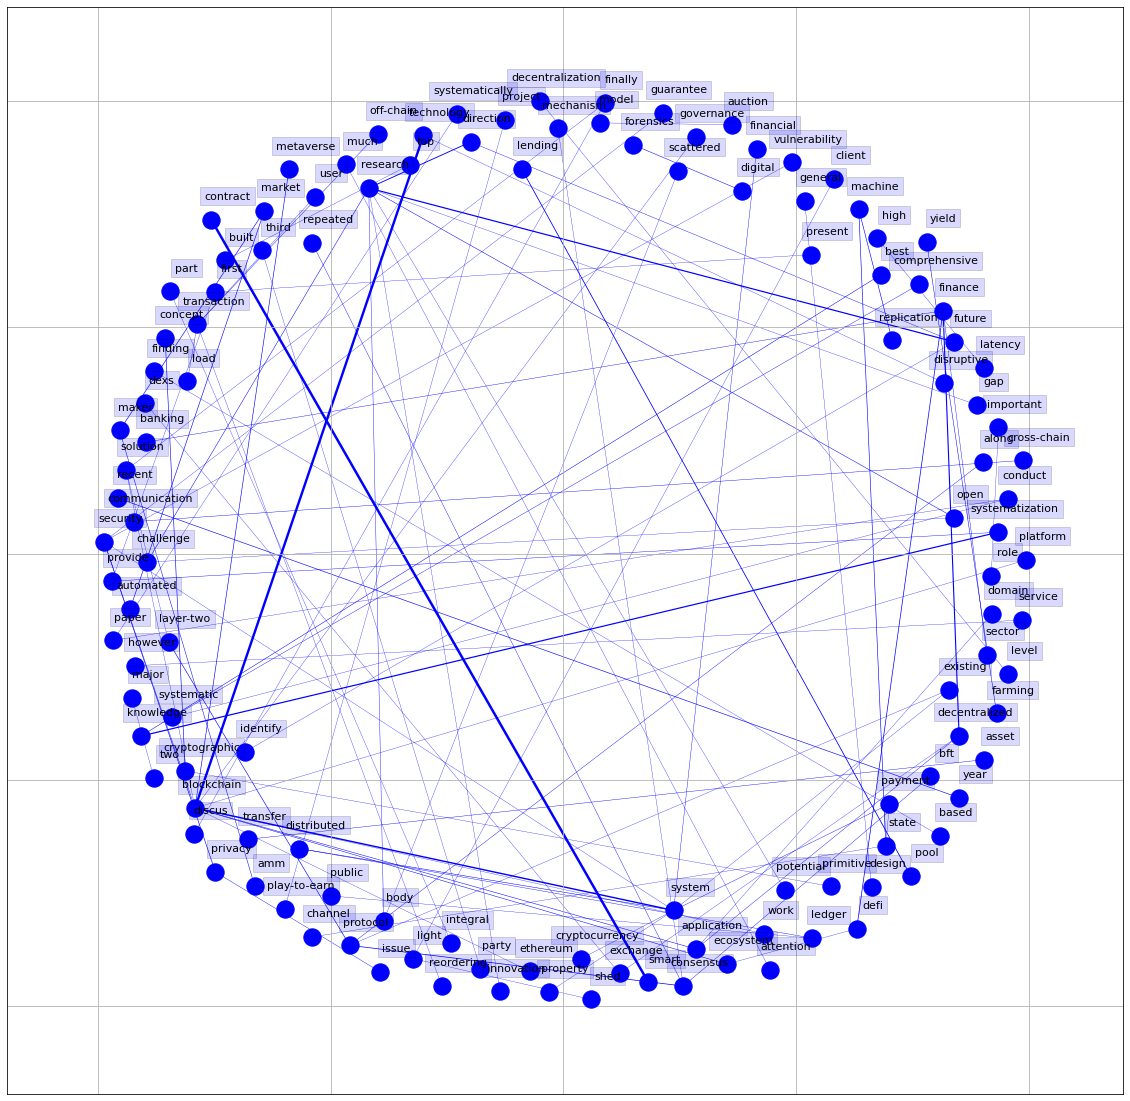

In [176]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='blue',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.15),
            horizontalalignment='center', fontsize=11)
    
plt.show()

In [177]:
import os

new_path = "figures/Abstract_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [178]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/Abstract_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/Abstract_bigram.html")

<ipython-input-178-017664b3c192>:1: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.

